In [1]:
import numpy as np


def solve_inv(A, B):
    """
    Решает систему линейных уравнений методом обратной матрицы.
    """
    if np.linalg.det(A) != 0:
        return np.linalg.inv(A) @ B


def solve_kramer(A, B):
    """
    Решает систему линейных уравнений методом Крамера.
    """
    if np.linalg.det(A) != 0:
        n = A.shape[1]
        X = []
        dA = np.linalg.det(A)
        for i in range(n):
            buf = np.copy(A)
            buf[:, i] = B
            X.append(np.linalg.det(buf) / dA)
        return X


def diag(A, B):
    """
    Приводит матрицу A к диагональному виду.
    """
    n = A.shape[0]
    A = np.array(A)
    B = np.array(B)

    for i in range(n):
        col = list(map(abs, A[:, i]))[i:n]
        row_A = np.array(A[i, :])
        row_B = np.array(B[i, 0])

        main_index = col.index(max(col)) + i
        main_el = A[main_index, i]

        A[i, :], A[main_index, :] = A[main_index, :], row_A
        B[i, 0], B[main_index, 0] = B[main_index, 0], row_B

        for j in range(i, n):
            A[i, j] /= main_el
        B[i, 0] /= main_el

        row = np.array(A[i, :])

        for j in range(i + 1, n):
            k = A[j, i]
            A[j, :] -= row * k
            B[j, 0] -= B[i, 0] * k

    return A, B


def solve_gauss(A, B):
    """
    Решает систему линейных уравнений методом Гаусса.
    """
    n = A.shape[1]
    X = np.zeros((n, 1))

    X[n - 1, 0] = B[n - 1, 0]

    for i in range(n - 2, -1, -1):
        c = 0
        for j in range(n - 1, i, -1):
            c += A[i, j] * X[j, 0]

        X[i, 0] = B[i, 0] - c

    return X


def solve_rref(A, B):
    """
    Решает систему линейных уравнений методом приведения матрицы к ступенчатому виду.
    """
    n = A.shape[0]

    A = np.array(A).T
    B = np.array(B).T
    Q = np.vstack((A, B)).T

    Q = np.linalg.matrix_rank(Q)

    return np.array(Q[:, n])


def main():
    np.random.seed(0)
    n = 5
    cond = 10 ** 3

    while True:
        A = np.random.random((n, n))
        if np.linalg.cond(A) >= cond:
            break

    B = np.random.random((n, 1))

    print("task 1: Inverse Matrix Method")
    print(solve_inv(A, B))

    print("task 2: Cramer's Rule")
    print(solve_kramer(A, B))

    print("task 3: Gaussian Elimination")
    A, B = diag(A, B)
    print(solve_gauss(A, B))

    print("task 4: Reduced Row Echelon Form")
    A, B = diag(A, B)
    print(solve_rref(A, B))


main()


task 1: Inverse Matrix Method
[[ -24.78326844]
 [ 371.99396492]
 [-137.81759134]
 [  71.92281052]
 [-254.32367329]]
task 2: Cramer's Rule


ValueError: could not broadcast input array from shape (5,1) into shape (5,)

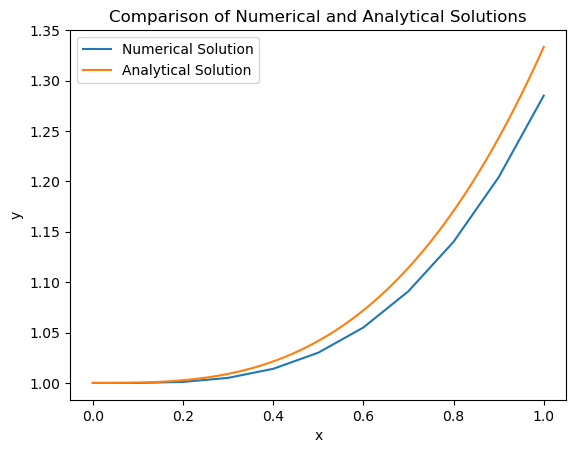

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(h, N):
    x = np.zeros(N+1)
    y = np.zeros(N+1)

    x[0] = 0
    y[0] = 1

    for i in range(N):
        x[i+1] = x[i] + h
        y[i+1] = y[i] + h * x[i]**2

    return x, y

# Параметры сетки
h = 0.1  # Шаг сетки
N = int(1 / h)  # Количество шагов

# Численное решение методом Эйлера
x_num, y_num = euler_method(h, N)

# Аналитическое решение
x_analytical = np.linspace(0, 1, 100)
y_analytical = (1/3) * x_analytical**3 + 1

# График численного и аналитического решений
plt.plot(x_num, y_num, label='Numerical Solution')
plt.plot(x_analytical, y_analytical, label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Numerical and Analytical Solutions')
plt.legend()
plt.show()
